In [2]:
import warnings
import pandas as pd
import sys, os


from causalnex.structure import StructureModel


/home/n/anaconda3/envs/env_causal/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("../data/df_all_encoded.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   game_id             605 non-null    object 
 1   cta_start_x         605 non-null    float64
 2   cta_start_y         605 non-null    float64
 3   cta_end_x           605 non-null    float64
 4   cta_end_y           605 non-null    float64
 5   cta_height          605 non-null    float64
 6   cta_width           605 non-null    float64
 7   color_1_occurance   605 non-null    float64
 8   color_2_occurance   605 non-null    float64
 9   color_3_occurance   605 non-null    float64
 10  color_4_occurance   605 non-null    float64
 11  color_5_occurance   605 non-null    float64
 12  audio_duration(ms)  605 non-null    float64
 13  audio_intensity     605 non-null    float64
 14  audio_frame_count   605 non-null    float64
 15  beg_frame_angry     605 non-null    float64
 16  beg_fram

In [4]:
df.drop(['color_1_occurance',
 "color_2_occurance",
 "color_3_occurance",
 "color_4_occurance",
 "game_id",
 'color_5_occurance'],inplace=True, axis=1)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cta_start_x         605 non-null    float64
 1   cta_start_y         605 non-null    float64
 2   cta_end_x           605 non-null    float64
 3   cta_end_y           605 non-null    float64
 4   cta_height          605 non-null    float64
 5   cta_width           605 non-null    float64
 6   audio_duration(ms)  605 non-null    float64
 7   audio_intensity     605 non-null    float64
 8   audio_frame_count   605 non-null    float64
 9   beg_frame_angry     605 non-null    float64
 10  beg_frame_disgust   605 non-null    float64
 11  beg_frame_fear      605 non-null    float64
 12  beg_frame_happy     605 non-null    float64
 13  beg_frame_sad       605 non-null    float64
 14  beg_frame_surprise  605 non-null    float64
 15  beg_frame_neutral   605 non-null    float64
 16  end_fram

In [7]:
df.dtypes.value_counts()

float64    29
int64       7
dtype: int64

In [8]:
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [10]:
df = clean_dataset(df)

/tmp/ipykernel_488226/1366205758.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 603
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cta_start_x         383 non-null    float64
 1   cta_start_y         383 non-null    float64
 2   cta_end_x           383 non-null    float64
 3   cta_end_y           383 non-null    float64
 4   cta_height          383 non-null    float64
 5   cta_width           383 non-null    float64
 6   audio_duration(ms)  383 non-null    float64
 7   audio_intensity     383 non-null    float64
 8   audio_frame_count   383 non-null    float64
 9   beg_frame_angry     383 non-null    float64
 10  beg_frame_disgust   383 non-null    float64
 11  beg_frame_fear      383 non-null    float64
 12  beg_frame_happy     383 non-null    float64
 13  beg_frame_sad       383 non-null    float64
 14  beg_frame_surprise  383 non-null    float64
 15  beg_frame_neutral   383 non-null    float64
 16  end_fram

In [12]:
def return_position_val(x,y):
    if x < 300 and y < 300:
        return "top_left"
    elif x < 300 and y < 600:
        return "center_left"
    elif x < 300 and y < 900:
        return "bottom_left"
    elif x < 600 and y < 300:
        return "top_center"
    elif x < 600 and y < 600:
        return "center"
    elif x < 600 and y < 900:
        return "bottom_center"
    elif x < 940 and y < 300:
        return "top_right"
    elif x < 940 and y < 600:
        return "top_center"
    else: return "bottom_right"

In [13]:
def encode_coordinates(df):
    encoded_val = []
    for i,row in df.iterrows():
        encoded_val.append(return_position_val(row['cta_start_x'],row['cta_start_y']))
    return encoded_val

In [14]:
def calc_area(df):
    area = []
    for i,row in df.iterrows():
        area.append(row['cta_width']*row['cta_height'])
    return area

In [15]:
df['cta_position'] = encode_coordinates(df)
df['cta_position'].value_counts()

bottom_left      141
bottom_center     87
top_left          66
center_left       38
top_center        27
center            12
bottom_right       6
top_right          6
Name: cta_position, dtype: int64

In [16]:
df['area'] = calc_area(df)
df['area'].describe()

count       383.000000
mean      36178.864230
std       90723.888828
min        4046.000000
25%       11700.000000
50%       17094.000000
75%       19200.000000
max      540000.000000
Name: area, dtype: float64

In [17]:
cols = ['cta_start_x', 'cta_start_y', 'cta_end_x', 'cta_end_y',
       'cta_height', 'cta_width',]
df.drop(cols, inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 603
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   audio_duration(ms)  383 non-null    float64
 1   audio_intensity     383 non-null    float64
 2   audio_frame_count   383 non-null    float64
 3   beg_frame_angry     383 non-null    float64
 4   beg_frame_disgust   383 non-null    float64
 5   beg_frame_fear      383 non-null    float64
 6   beg_frame_happy     383 non-null    float64
 7   beg_frame_sad       383 non-null    float64
 8   beg_frame_surprise  383 non-null    float64
 9   beg_frame_neutral   383 non-null    float64
 10  end_frame_angry     383 non-null    float64
 11  end_frame_disgust   383 non-null    float64
 12  end_frame_fear      383 non-null    float64
 13  end_frame_happy     383 non-null    float64
 14  end_frame_sad       383 non-null    float64
 15  end_frame_surprise  383 non-null    float64
 16  end_fram

In [18]:
df_1 = df.copy()

In [27]:
df_1.columns.tolist()

['audio_duration(ms)',
 'audio_intensity',
 'audio_frame_count',
 'beg_frame_angry',
 'beg_frame_disgust',
 'beg_frame_fear',
 'beg_frame_happy',
 'beg_frame_sad',
 'beg_frame_surprise',
 'beg_frame_neutral',
 'end_frame_angry',
 'end_frame_disgust',
 'end_frame_fear',
 'end_frame_happy',
 'end_frame_sad',
 'end_frame_surprise',
 'end_frame_neutral',
 'beg_frame_age',
 'end_frame_age',
 'sentiment_score',
 'word_count',
 'ER',
 'CTR',
 'sentiment_a',
 'sentiment_b',
 'color_3_l_encoded',
 'color_2_l_encoded',
 'color_4_l_encoded',
 'color_5_l_encoded',
 'color_1_l_encoded',
 'cta_position',
 'area']

In [ ]:
val = {}
for i,col in df_1.columns.tolist():
    val[i] = col

In [28]:

df_1


,audio_duration(ms),audio_intensity,audio_frame_count,beg_frame_angry,beg_frame_disgust,beg_frame_fear,beg_frame_happy,beg_frame_sad,beg_frame_surprise,beg_frame_neutral,...,CTR,sentiment_a,sentiment_b,color_3_l_encoded,color_2_l_encoded,color_4_l_encoded,color_5_l_encoded,color_1_l_encoded,cta_position,area
0,23212.0,-25.012642,1114176.0,1.591668e-01,1.553621e-08,5.339582e-03,0.004175,1.355733,4.117561e-04,98.475176,...,0.003018,1.0,0.0,177.0,184.0,359.0,423.0,24.0,top_left,540000.0
1,16668.0,-30.754527,800064.0,1.960182e-02,2.949585e-05,9.907534e+01,0.454488,0.383166,8.194523e-04,0.066553,...,0.045814,0.0,1.0,337.0,42.0,318.0,154.0,345.0,bottom_center,11700.0
2,29135.0,-22.346725,1398464.0,3.877749e-02,4.248557e-19,1.390411e-09,0.000066,0.003894,1.250058e-13,99.957263,...,0.003419,1.0,0.0,427.0,375.0,390.0,425.0,24.0,bottom_left,25090.0
3,18729.0,-31.439108,899008.0,1.960182e-02,2.949585e-05,9.907534e+01,0.454488,0.383166,8.194523e-04,0.066553,...,0.042228,0.0,1.0,337.0,42.0,140.0,0.0,345.0,bottom_center,11700.0
4,3017.0,-56.157595,144832.0,1.559730e+01,4.429096e-06,8.937431e-03,0.359610,79.658431,1.090498e-04,4.375614,...,0.031322,1.0,0.0,310.0,45.0,319.0,438.0,345.0,bottom_left,19200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,0.0,0.000000,0.0,3.521456e-06,1.011109e-15,2.722547e-09,99.879324,0.000003,1.179597e-04,0.120547,...,0.016426,0.0,0.0,23.0,27.0,6.0,22.0,29.0,center_left,25090.0
599,22876.0,-30.645497,1098048.0,5.881038e-02,4.056882e-07,3.986825e-01,16.262372,0.000114,8.201948e+01,1.260545,...,0.021635,1.0,0.0,410.0,103.0,7.0,164.0,110.0,top_center,9650.0
601,2487.0,-61.365838,119360.0,8.657137e-03,3.220113e-04,8.517282e+01,14.137602,0.326243,8.556829e-02,0.268791,...,0.033360,1.0,0.0,337.0,42.0,318.0,154.0,345.0,top_center,11700.0
602,20855.0,-31.321199,1001024.0,5.080079e-09,9.236034e-28,9.101977e-04,7.951155,2.643151,1.149636e-01,89.289820,...,0.004761,1.0,0.0,185.0,162.0,259.0,386.0,124.0,top_left,20097.0


In [19]:
df = df_1.copy()

#### Create Structure Model

In [20]:
sm = StructureModel()

#### Create Edges
* Transform and encode

In [21]:
import numpy as np

struct_data = df.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)

['cta_position']


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

#### Scale and normalize numerical data

In [23]:
from sklearn import preprocessing

x = struct_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

#### Apply the NOTEARS algorithm to learn the structure.

In [24]:
from causalnex.structure.notears import from_pandas

sm = from_pandas(df)

#### Visualize

/home/n/anaconda3/envs/env_causal/lib/python3.8/site-packages/pygraphviz/agraph.py:1405: RuntimeWarning: Warning: node '0', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


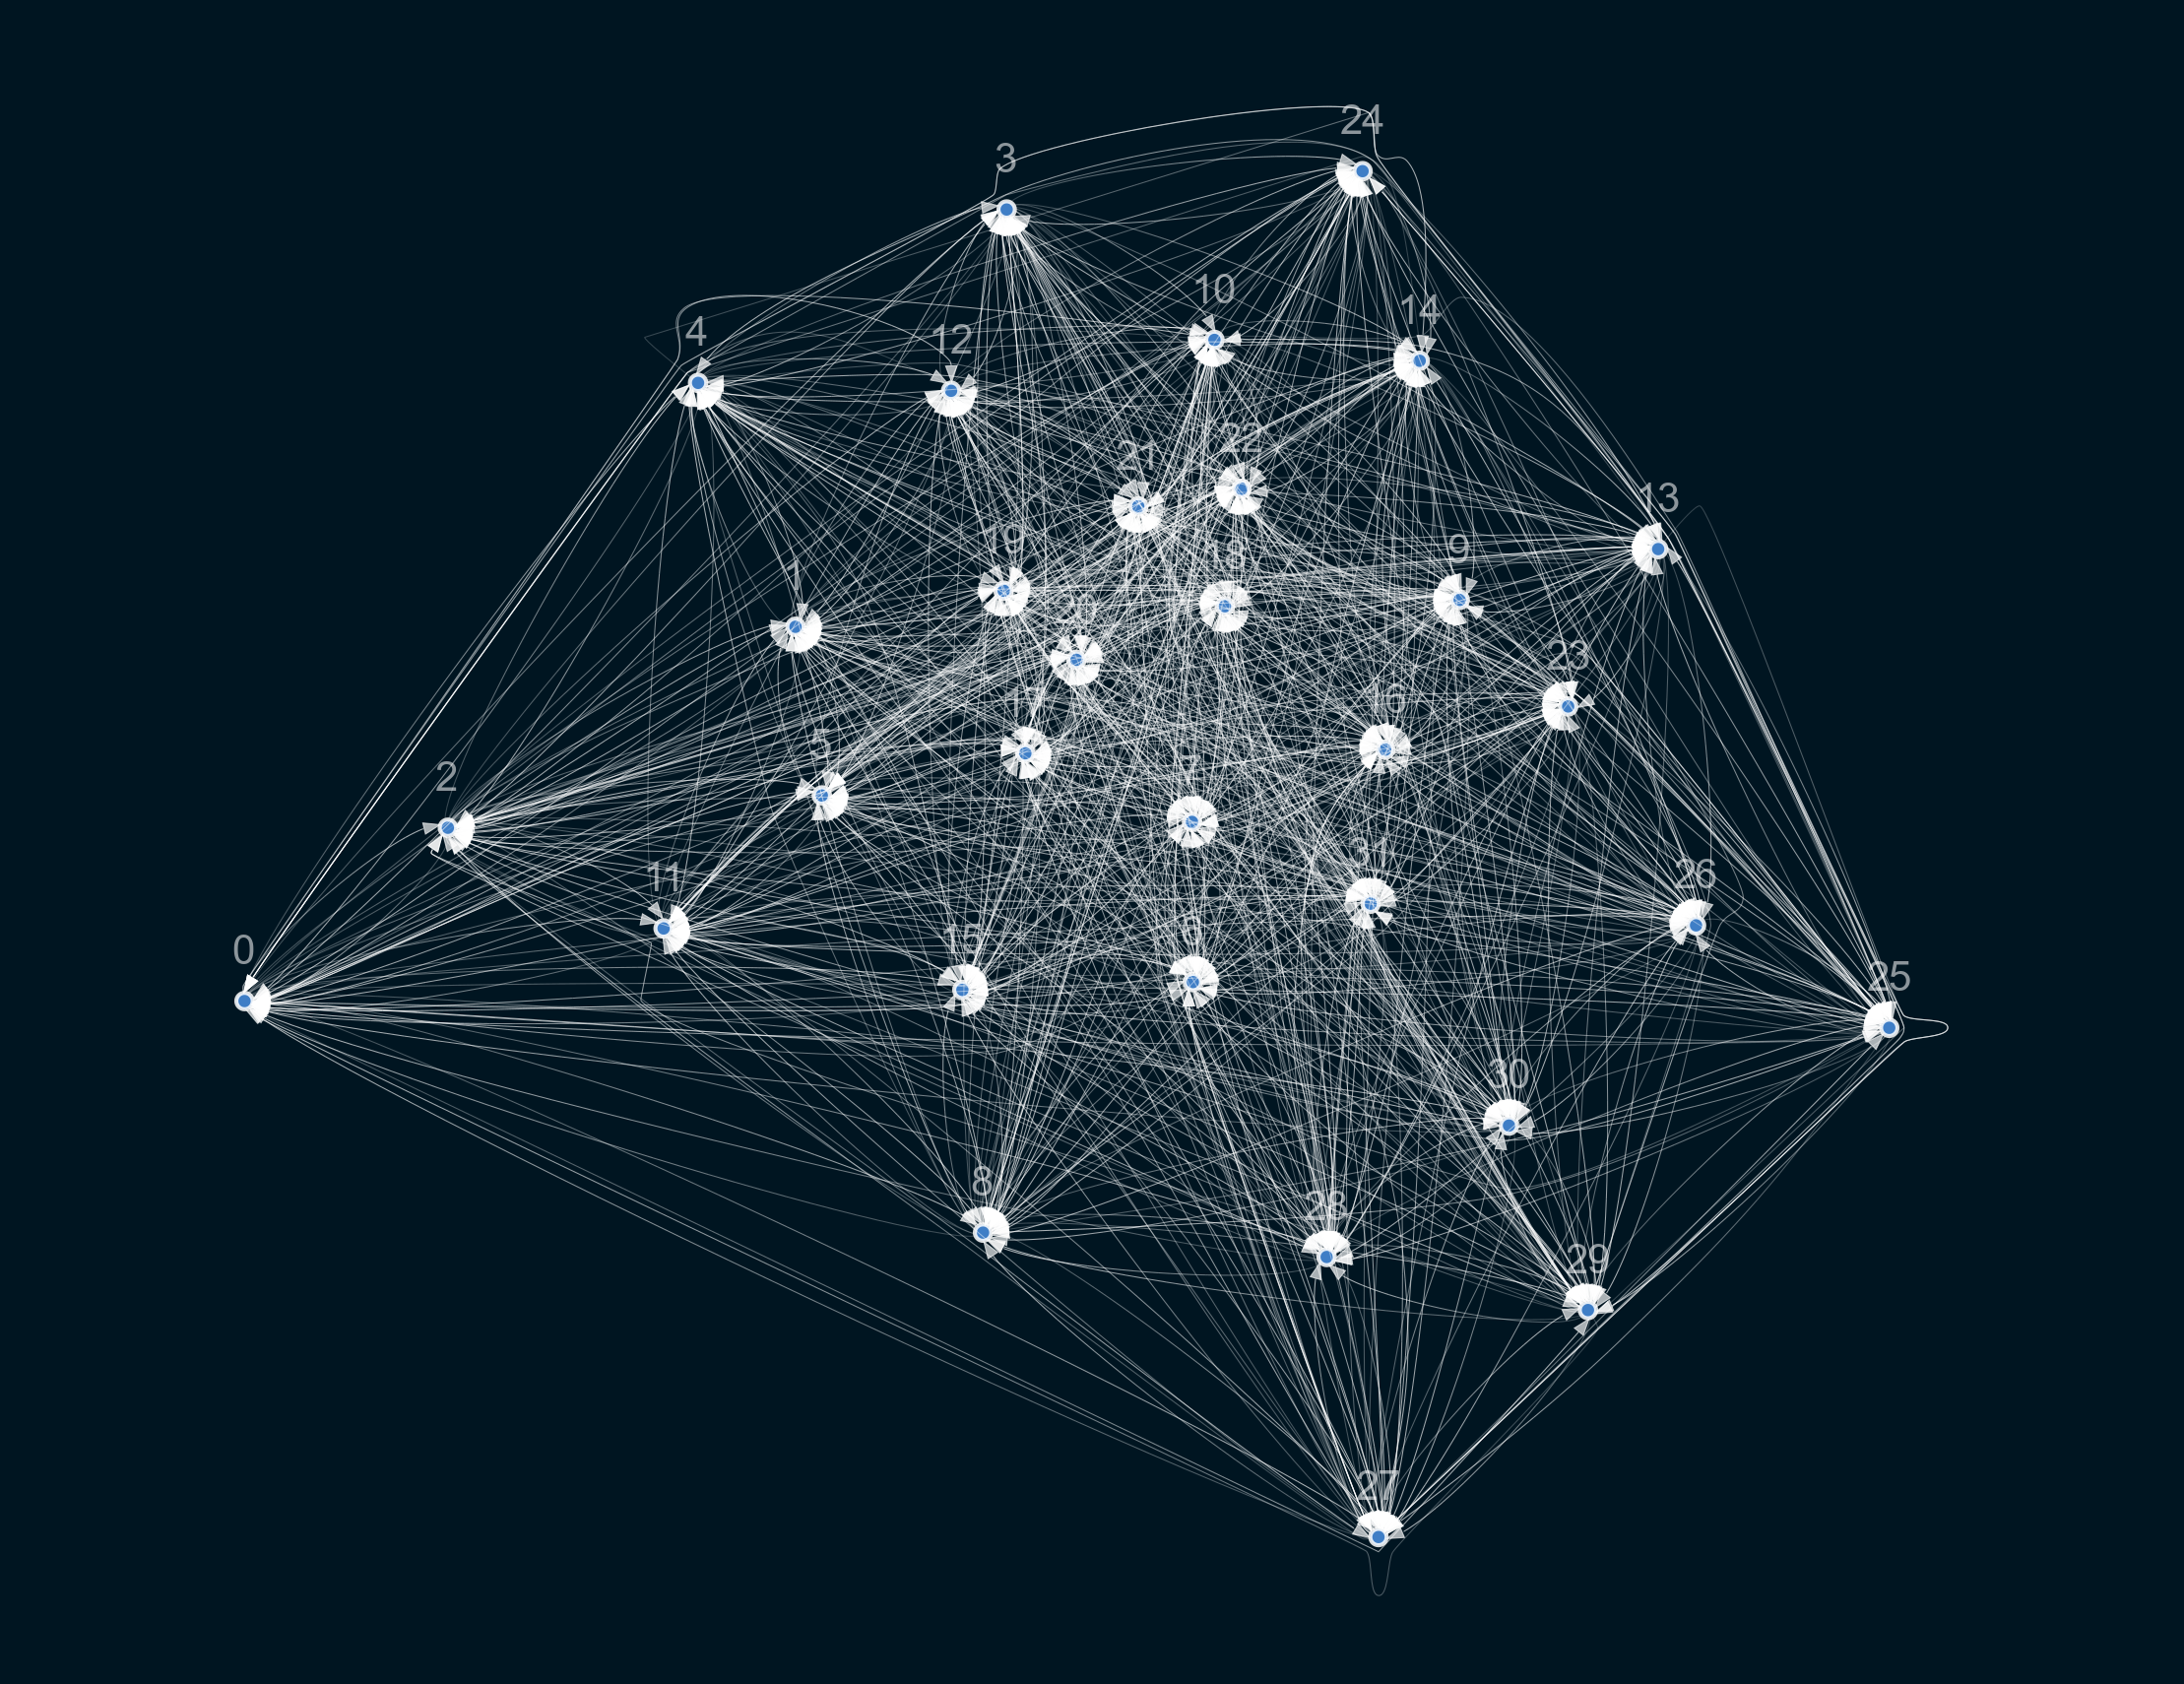

In [25]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE


viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp',
)
Image(viz.draw(format='png'))

/home/n/anaconda3/envs/env_causal/lib/python3.8/site-packages/pygraphviz/agraph.py:1405: RuntimeWarning: Warning: node '0', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/home/n/anaconda3/envs/env_causal/lib/python3.8/site-packages/pygraphviz/agraph.py:1405: RuntimeWarning: Warning: node '0', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


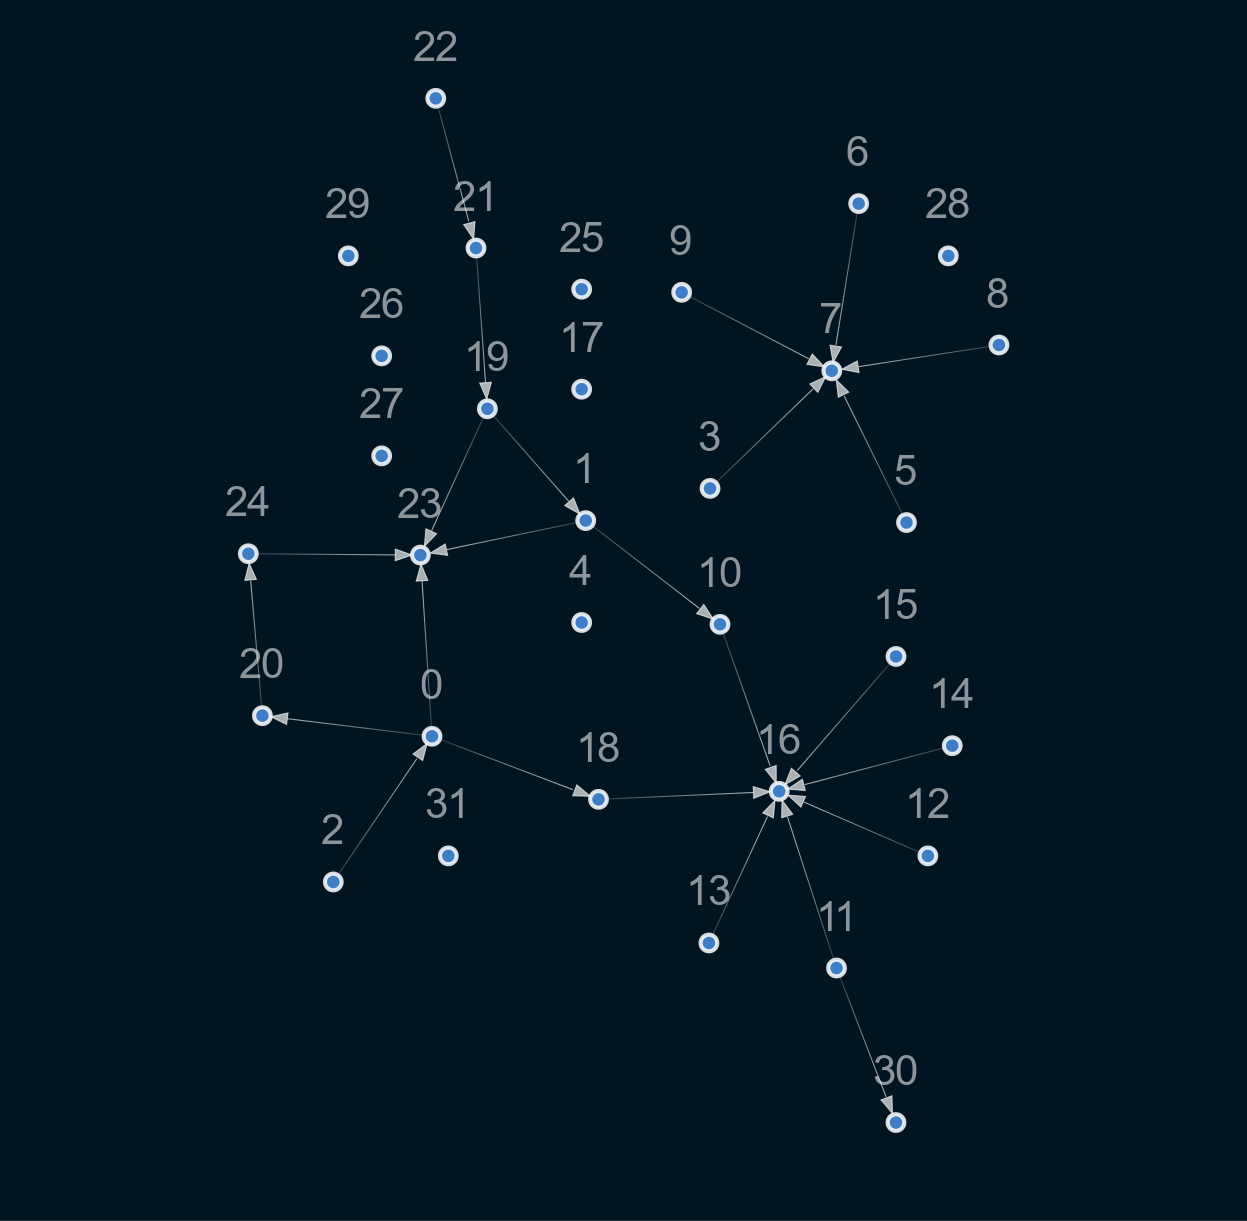

In [26]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))

#### Rename Columns

In [30]:
val = {}
for i,col in enumerate(df_1.columns.tolist()):
    val[i] = col
val

{0: 'audio_duration(ms)',
 1: 'audio_intensity',
 2: 'audio_frame_count',
 3: 'beg_frame_angry',
 4: 'beg_frame_disgust',
 5: 'beg_frame_fear',
 6: 'beg_frame_happy',
 7: 'beg_frame_sad',
 8: 'beg_frame_surprise',
 9: 'beg_frame_neutral',
 10: 'end_frame_angry',
 11: 'end_frame_disgust',
 12: 'end_frame_fear',
 13: 'end_frame_happy',
 14: 'end_frame_sad',
 15: 'end_frame_surprise',
 16: 'end_frame_neutral',
 17: 'beg_frame_age',
 18: 'end_frame_age',
 19: 'sentiment_score',
 20: 'word_count',
 21: 'ER',
 22: 'CTR',
 23: 'sentiment_a',
 24: 'sentiment_b',
 25: 'color_3_l_encoded',
 26: 'color_2_l_encoded',
 27: 'color_4_l_encoded',
 28: 'color_5_l_encoded',
 29: 'color_1_l_encoded',
 30: 'cta_position',
 31: 'area'}

In [31]:
df = df.rename(columns=val, errors="raise")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   audio_duration(ms)  383 non-null    float64
 1   audio_intensity     383 non-null    float64
 2   audio_frame_count   383 non-null    float64
 3   beg_frame_angry     383 non-null    float64
 4   beg_frame_disgust   383 non-null    float64
 5   beg_frame_fear      383 non-null    float64
 6   beg_frame_happy     383 non-null    float64
 7   beg_frame_sad       383 non-null    float64
 8   beg_frame_surprise  383 non-null    float64
 9   beg_frame_neutral   383 non-null    float64
 10  end_frame_angry     383 non-null    float64
 11  end_frame_disgust   383 non-null    float64
 12  end_frame_fear      383 non-null    float64
 13  end_frame_happy     383 non-null    float64
 14  end_frame_sad       383 non-null    float64
 15  end_frame_surprise  383 non-null    float64
 16  end_fram

In [33]:
sm = from_pandas(df, w_threshold=0.8)

/home/n/anaconda3/envs/env_causal/lib/python3.8/site-packages/pygraphviz/agraph.py:1405: RuntimeWarning: Warning: node 'audio_duration(ms)', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/home/n/anaconda3/envs/env_causal/lib/python3.8/site-packages/pygraphviz/agraph.py:1405: RuntimeWarning: Warning: node 'audio_duration(ms)', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


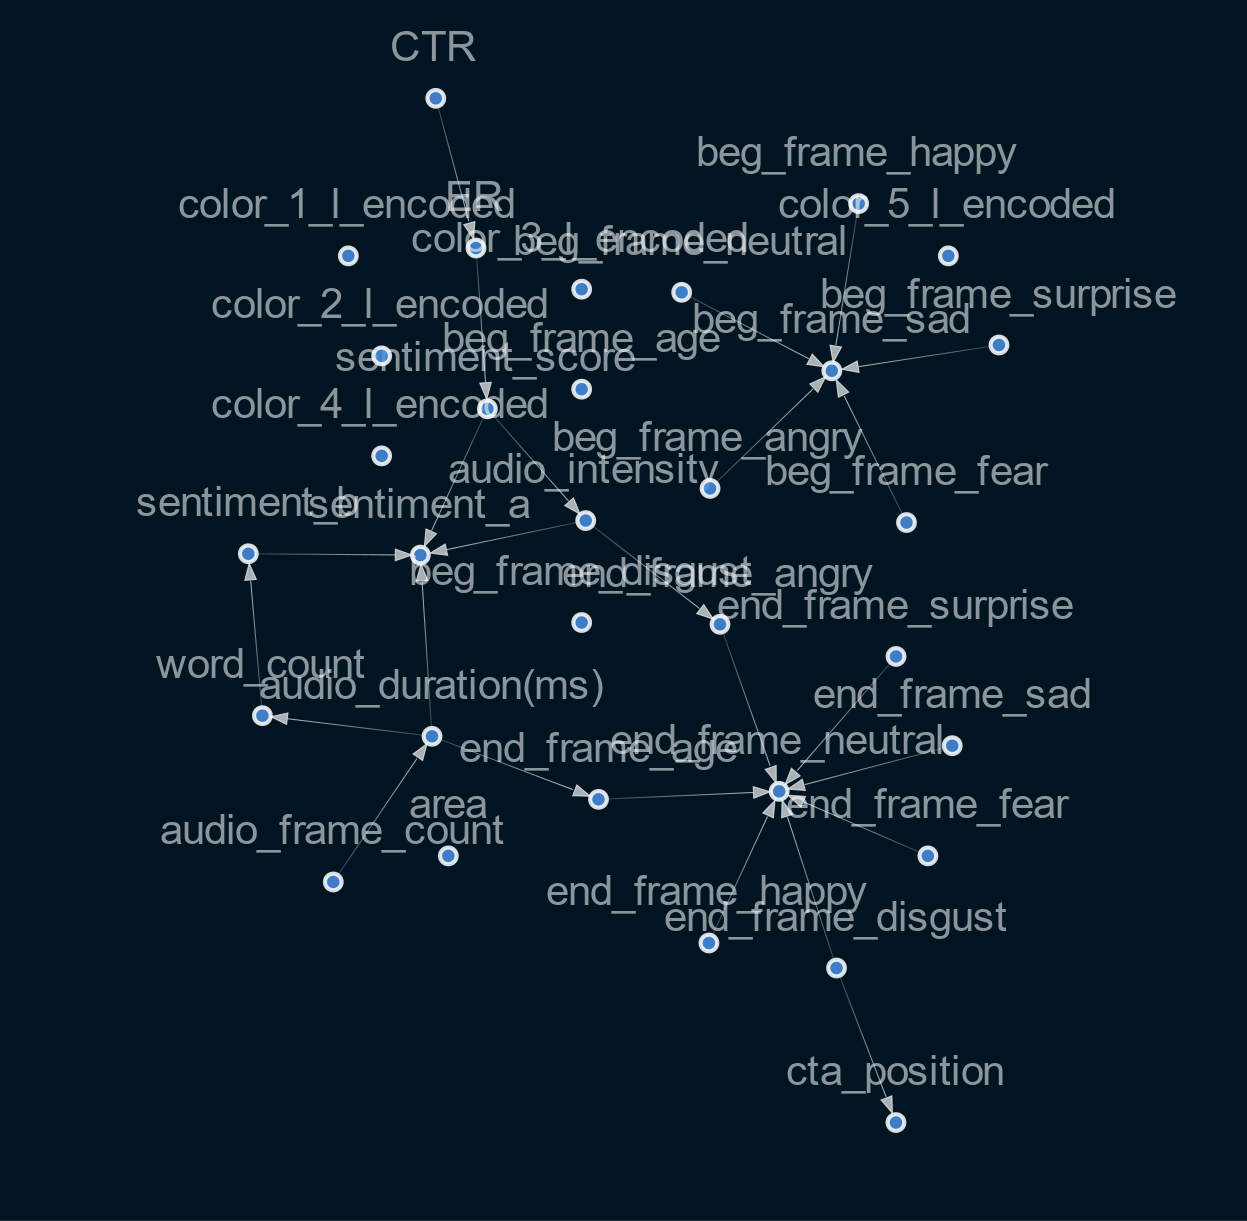

In [34]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'))